In [124]:
# 1/n Portfolio, Daily rebalancing
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import cvxpy as cvx

In [125]:
prices = pd.read_csv("smi2017_adjclose.txt", index_col="Date", parse_dates=True).sort_index()

In [126]:
returns = prices.pct_change()

In [127]:
print(100*16*returns.std().sort_values())

SCMN.VX   10.54%
SGSN.VX   12.32%
ZURN.VX   12.40%
NESN.VX   13.67%
GIVN.VX   14.39%
GEBN.VX   14.89%
NOVN.VX   14.98%
SREN.VX   15.12%
SLHN.VX   15.23%
ABBN.VX   15.65%
ROG.VX    15.95%
SIK.VX    16.02%
ADEN.VX   17.39%
BAER.VX   18.83%
LHN.VX    20.04%
CFR.VX    20.57%
LONN.VX   21.26%
UHR.VX    22.08%
CSGN.VX   23.99%
UBSG.VX   57.20%
dtype: float64


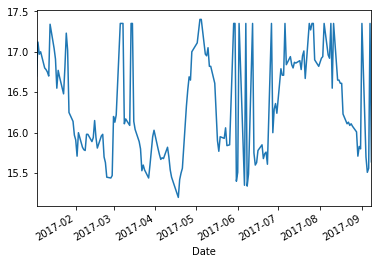

In [128]:
# Severe problems with data quality here...
prices["UBSG.VX"].plot()
plt.show()

In [129]:
matrix = returns.fillna(0.0)

In [130]:
matrix

,ABBN.VX,ADEN.VX,BAER.VX,CFR.VX,CSGN.VX,GEBN.VX,GIVN.VX,LHN.VX,LONN.VX,NESN.VX,NOVN.VX,ROG.VX,SCMN.VX,SGSN.VX,SIK.VX,SLHN.VX,SREN.VX,UBSG.VX,UHR.VX,ZURN.VX
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2017-01-04,0.00%,0.03%,0.01%,-0.01%,0.03%,-0.01%,0.01%,0.00%,0.03%,0.01%,-0.01%,0.01%,0.02%,-0.00%,-0.00%,0.01%,0.00%,0.03%,-0.01%,0.00%
2017-01-05,0.00%,0.00%,0.01%,-0.01%,-0.02%,0.01%,0.00%,0.01%,0.01%,0.01%,0.01%,0.01%,0.02%,0.01%,-0.00%,-0.00%,-0.01%,-0.01%,-0.01%,-0.00%
2017-01-06,0.01%,-0.00%,-0.01%,0.02%,0.01%,-0.00%,-0.00%,0.00%,0.00%,0.01%,-0.00%,0.00%,0.00%,-0.00%,-0.01%,0.00%,-0.00%,0.00%,0.01%,-0.00%
2017-01-09,-0.00%,-0.00%,-0.01%,0.01%,0.00%,-0.00%,-0.00%,-0.01%,-0.00%,0.00%,0.00%,0.00%,-0.00%,0.01%,0.01%,-0.00%,-0.01%,-0.01%,0.03%,-0.00%
2017-01-10,0.01%,0.01%,0.01%,0.04%,-0.00%,0.00%,-0.01%,0.00%,0.00%,-0.01%,0.01%,0.01%,-0.01%,-0.01%,-0.00%,-0.01%,-0.00%,-0.00%,0.03%,-0.00%
2017-01-11,0.02%,0.00%,-0.00%,0.00%,0.01%,0.01%,0.01%,-0.01%,0.01%,0.00%,-0.01%,-0.01%,-0.00%,0.01%,0.00%,0.00%,0.00%,-0.00%,0.00%,0.00%
2017-01-12,-0.01%,0.01%,-0.00%,0.09%,-0.02%,-0.00%,-0.00%,-0.00%,-0.01%,0.00%,-0.02%,-0.02%,-0.00%,0.00%,-0.01%,-0.00%,-0.01%,-0.00%,0.05%,-0.01%
2017-01-13,0.01%,0.00%,0.02%,0.01%,0.03%,0.00%,-0.00%,0.02%,0.00%,0.00%,0.00%,0.01%,0.00%,0.01%,0.01%,0.00%,0.01%,0.04%,0.01%,0.01%


In [131]:
# Define an initial position
w0 = 0.05*np.ones(20)

In [132]:
w0

array([ 0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
        0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
        0.05,  0.05])

In [133]:
def elasticNet(matrix, w0, lamb_balance=0, lamb_trades=0):
    def __cvx2np(x):
        # convert cvx variable back to numpy
        return np.array([x[i].value for i in range(x.size[0])])

    def __objective():
        return cvx.Minimize(cvx.norm(matrix.values*w,2) + 
                            lamb_balance*cvx.norm(w,2) + 
                            lamb_trades*cvx.norm(w-w0,1))

    w = cvx.Variable(matrix.shape[1])
    cvx.Problem(__objective(), [0 <= w, cvx.sum_entries(w) == 1]).solve()
    return 100*pd.Series(index=matrix.keys(), data=__cvx2np(w)).sort_values()

In [134]:
elasticNet(matrix, w0, lamb_balance=0.0, lamb_trades=0.03)

UBSG.VX    0.70%
CSGN.VX    2.56%
UHR.VX     5.00%
LONN.VX    5.00%
LHN.VX     5.00%
BAER.VX    5.00%
CFR.VX     5.00%
ABBN.VX    5.00%
SLHN.VX    5.00%
ADEN.VX    5.00%
GEBN.VX    5.00%
SREN.VX    5.00%
ROG.VX     5.00%
NOVN.VX    5.00%
ZURN.VX    5.00%
SIK.VX     5.00%
SGSN.VX    5.00%
NESN.VX    5.00%
GIVN.VX    5.00%
SCMN.VX   11.74%
dtype: float64

In [ ]:
def pretty(weights):
    pd.options.display.float_format = '{:,.2f}%'.format
    smi = pd.read_csv("smi.txt", index_col="Ticker", squeeze=True)
    g = weights.copy()
    g.index = [smi[x] for x in g.index]
    return g

In [135]:
pretty(elasticNet(matrix, w0, lamb_balance=0.0, lamb_trades=0))

Lonza Group Ltd                      0.00%
LafargeHolcim Ltd                    0.00%
The Swatch Group AG                  0.00%
Julius Baer Group Ltd.               0.00%
Credit Suisse Group AG               0.00%
Swiss Life Holding AG                0.00%
Geberit AG                           0.00%
ABB Ltd                              0.00%
UBS Group AG                         0.39%
Swiss Re Ltd                         1.20%
Roche Holding AG                     2.17%
Adecco Group AG                      3.03%
Compagnie Financière Richemont SA    3.66%
Novartis AG                          3.68%
Nestlé S.A.                          5.92%
SGS SA                               8.03%
Sika AG                             10.24%
Givaudan SA                         12.56%
Zurich Insurance Group AG           14.58%
Swisscom AG                         34.56%
dtype: float64

In [136]:
pretty(elasticNet(matrix, w0, lamb_balance=0.4, lamb_trades=0))

UBS Group AG                        1.83%
Credit Suisse Group AG              3.30%
The Swatch Group AG                 3.59%
Lonza Group Ltd                     3.75%
LafargeHolcim Ltd                   3.99%
Julius Baer Group Ltd.              4.32%
Compagnie Financière Richemont SA   4.64%
ABB Ltd                             4.69%
Swiss Life Holding AG               4.79%
Adecco Group AG                     4.86%
Geberit AG                          5.35%
Swiss Re Ltd                        5.41%
Roche Holding AG                    5.53%
Novartis AG                         5.78%
Zurich Insurance Group AG           5.80%
Sika AG                             6.01%
SGS SA                              6.25%
Nestlé S.A.                         6.46%
Givaudan SA                         6.64%
Swisscom AG                         7.00%
dtype: float64

In [139]:
pretty(elasticNet(matrix, w0, lamb_balance=0.0, lamb_trades=0.03))

UBS Group AG                         0.70%
Credit Suisse Group AG               2.56%
The Swatch Group AG                  5.00%
Lonza Group Ltd                      5.00%
LafargeHolcim Ltd                    5.00%
Julius Baer Group Ltd.               5.00%
Compagnie Financière Richemont SA    5.00%
ABB Ltd                              5.00%
Swiss Life Holding AG                5.00%
Adecco Group AG                      5.00%
Geberit AG                           5.00%
Swiss Re Ltd                         5.00%
Roche Holding AG                     5.00%
Novartis AG                          5.00%
Zurich Insurance Group AG            5.00%
Sika AG                              5.00%
SGS SA                               5.00%
Nestlé S.A.                          5.00%
Givaudan SA                          5.00%
Swisscom AG                         11.74%
dtype: float64

In [140]:
pretty(elasticNet(matrix, w0, lamb_balance=0.4, lamb_trades=0.03))

UBS Group AG                        2.73%
Credit Suisse Group AG              5.00%
The Swatch Group AG                 5.00%
Lonza Group Ltd                     5.00%
LafargeHolcim Ltd                   5.00%
Julius Baer Group Ltd.              5.00%
Compagnie Financière Richemont SA   5.00%
ABB Ltd                             5.00%
Swiss Life Holding AG               5.00%
Adecco Group AG                     5.00%
Swiss Re Ltd                        5.00%
Geberit AG                          5.00%
Roche Holding AG                    5.00%
Zurich Insurance Group AG           5.00%
Novartis AG                         5.00%
Sika AG                             5.00%
SGS SA                              5.23%
Nestlé S.A.                         5.47%
Givaudan SA                         5.63%
Swisscom AG                         5.94%
dtype: float64